<p style='text-align: center;'><span style="color: #000508; font-family: Segoe UI; font-size: 2.5em; font-weight: 300;">Cowboy outfits detection MMDetection+CascadeRCNN+Weight&Bias</span></p>

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Overview</span>

&nbsp;&nbsp;✅&nbsp;&nbsp;MMDetection and Weights & Biases Setup<br>
&nbsp;&nbsp;✅&nbsp;&nbsp;Preparation of MMDetection Config<br>
&nbsp;&nbsp;✅&nbsp;&nbsp;Weights & Biases Integration<br>
&nbsp;&nbsp;✅&nbsp;&nbsp;Training and Evaluation<br>
&nbsp;&nbsp;✅&nbsp;&nbsp;Experiment Tracking and Logging with Weights & Biases<br>
&nbsp;&nbsp;✅&nbsp;&nbsp;Inference<br>

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">MMDetection</span>

[MMDetection](https://github.com/open-mmlab/mmdetection) is an open-source toolbox based on PyTorch for Object Detection and Segmentation tasks. The toolbox supports over **50+ baselines**.

<span style="color: #000508; font-family: Segoe UI; font-size: 1.4em;">🧫 Features:</span>

<p style='text-align: justify; font-family: Segoe UI;'><span style="color: #000508;  font-size: 1.1em; font-weight: 600;">Modular Design</span>: The framework is split into different components and we can easily construct a customized object detection framework by combining different modules.</p>

<p style='text-align: justify; font-family: Segoe UI;'><span style="color: #000508;  font-size: 1.1em; font-weight: 600;">Support of multiple frameworks out of box</span>: The toolbox directly supports popular and contemporary detection frameworks, e.g. Faster RCNN, Mask RCNN, RetinaNet, etc.</p>

<p style='text-align: justify; font-family: Segoe UI;'><span style="color: #000508;  font-size: 1.1em; font-weight: 600;">High efficiency</span>: All basic bbox and mask operations run on GPUs. The training speed is faster than or comparable to other codebases, including Detectron2, maskrcnn-benchmark and SimpleDet.</p>

<p style='text-align: justify; font-family: Segoe UI;'><span style="color: #000508;  font-size: 1.1em; font-weight: 600;">State of the art</span>: The toolbox stems from the codebase developed by the MMDet team, who won COCO Detection Challenge in 2018.</p>


<span style="color: #000508; font-family: Segoe UI; font-size: 1.4em;">🎆 References:</span>

- **Some amazing notebooks on MMdetection from [Sreevishnu Damodaran](https://www.kaggle.com/sreevishnudamodaran)**
    - https://www.kaggle.com/sreevishnudamodaran/siim-mmdetection-cascadercnn-weight-bias


- https://www.kaggle.com/c/cowboyoutfits/discussion/254656
- https://www.kaggle.com/c/cowboyoutfits/discussion/254354

<span style="color: #000508; font-family: Segoe UI; font-size: 1.4em;">Please upvote if you like this</span>



<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📐 Setup MMDetection</span>

In [1]:
%%bash
# Check nvcc version
nvcc -V
echo
# Check GCC version
gcc --version
echo
# Check the version of torch and cuda packages
pip list | grep "torch\|cuda"

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.


jaxlib                         0.1.68+cuda110
nnabla-ext-cuda110             1.20.1
pycuda                         2021.1
pytorch-ignite                 0.4.5
pytorch-lightning              1.3.8
torch                          1.7.0
torchaudio                     0.7.0a0+ac17b64
torchmetrics                   0.4.1
torchtext                      0.8.0a0+cd6902d
torchvision                    0.8.1


In [2]:
%%capture
!pip install mmcv-full==1.3.8 -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.7.0/index.html

In [3]:
%%capture
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection && pip install -e .

!pip install Pillow==7.0.0

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Setup Weights & Biases</span>

In [4]:
%%capture
!pip install wandb --upgrade

To connect the Kaggle Notebook and log in to Weights & Biases, we need to create an API key:

1. New users can sign up for a Free Weights & Biases account for Research and Personal use from the https://wandb.ai/site page. Sign up process takes around 1-2 minutes.
2. Now get the API key from https://wandb.ai/authorize.

Login to Weights & Biases from the notebook with the API key by using any of the two methods below:

* Interative:
    1. Run a cell with wandb.login(). It will ask for the API key, which can be copied and pasted to authenticate.

* Kaggle Secrets:
    1. The recommended way to use the API key is to use Kaggle Secrets to store the API key. From the top Menu on the Notebook Editor, click on 'Add-ons' and then, select 'Secrets'.
    2. Select 'Add a new secret' and provide 'wandb_key' for label and it's value as the API key obtained from the previous steps.

In [5]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

# I have saved my API token with "wandb_api" as Label. 
# If you use some other Label make sure to change the same below. 
wandb_api = user_secrets.get_secret("wandb_key") 

wandb.login(key=wandb_api)

wandb: W&B API key is configured (use `wandb login --relogin` to force relogin)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publically.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Imports and Seed Everything</span>

In [6]:
import sys
sys.path.insert(0, "./mmdetection")

import os
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMDetection installation
from mmdet.apis import set_random_seed

# Imports
import mmdet
from mmdet.apis import set_random_seed
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

import random
import numpy as np
from pathlib import Path
import copy
import json
from pycocotools.coco import COCO

1.7.0 True
11.0
GCC 7.3


In [7]:
seed = 123

"""Sets the random seeds."""
set_random_seed(seed, deterministic=False)
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED'] = str(seed)

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Split Train and Valid Data Set</span>


In [8]:
!mkdir new_anno

You can change the test_n to get a different split

In [9]:
random.seed(seed)

def create_subset(c, cats, test_n=180):
    new_coco = {}
    new_coco['info'] = {"description": "CowboySuit",
                        "url": "http://github.com/dmlc/gluon-cv",
                        "version": "1.0","year": 2021,
                        "contributor": "GluonCV/AutoGluon",
                        "date_created": "2021/07/01"}
    new_coco["licenses"]: [
        {"url": "http://creativecommons.org/licenses/by/2.0/","id": 4,"name": "Attribution License"}]
    cat_ids = c.getCatIds(cats)
    train_img_ids = set()

    test_img_ids = set()
    for cat in cat_ids[::-1]:
        img_ids = copy.copy(c.getImgIds(catIds=[cat]))
        random.shuffle(img_ids)
        tn = min(test_n, int(len(img_ids) * 0.5))
        new_test = set(img_ids[:tn])
        exist_test_ids = new_test.intersection(train_img_ids)
        test_ids = new_test.difference(exist_test_ids)
        train_ids = set(img_ids).difference(test_ids)
        print(tn, len(img_ids), len(new_test), len(test_ids), len(train_ids))
        train_img_ids.update(train_ids)
        test_img_ids.update(test_ids)
#         print(len(test_img_ids))

    # prune duplicates
    dup = train_img_ids.intersection(test_img_ids)
    train_img_ids = train_img_ids - dup

    train_anno_ids = set()
    test_anno_ids = set()
    for cat in cat_ids:
        train_anno_ids.update(c.getAnnIds(imgIds=list(train_img_ids), catIds=[cat]))
        test_anno_ids.update(c.getAnnIds(imgIds=list(test_img_ids), catIds=[cat]))

    assert len(train_img_ids.intersection(test_img_ids)) == 0, 'img id conflicts, {} '.format(train_img_ids.intersection(test_img_ids))
    assert len(train_anno_ids.intersection(test_anno_ids)) == 0, 'anno id conflicts'
    print('train img ids #:', len(train_img_ids), 'train anno #:', len(train_anno_ids))
    print('valid img ids #:', len(test_img_ids), 'test anno #:', len(test_anno_ids))
    new_coco_test = copy.deepcopy(new_coco)

    new_coco["images"] = c.loadImgs(list(train_img_ids))
    new_coco["annotations"] = c.loadAnns(list(train_anno_ids))
    for ann in new_coco["annotations"]:
        ann.pop('segmentation', None)
    new_coco["categories"] = c.loadCats(cat_ids)

    new_coco_test["images"] = c.loadImgs(list(test_img_ids))
    new_coco_test["annotations"] = c.loadAnns(list(test_anno_ids))
    for ann in new_coco_test["annotations"]:
        ann.pop('segmentation', None)
    new_coco_test["categories"] = c.loadCats(cat_ids)
    print('new train split, images:', len(new_coco["images"]), 'annos:', len(new_coco["annotations"]))
    print('new valid split, images:', len(new_coco_test["images"]), 'annos:', len(new_coco_test["annotations"]))
    return new_coco, new_coco_test

coco = COCO('../input/cowboyoutfits/train.json')
nc, nc_test = create_subset(coco, ['belt', 'sunglasses', 'boot', 'cowboy_hat', 'jacket', ])

with open('./new_anno/new_train.json', 'w') as f:
    json.dump(nc, f)
with open('./new_anno/new_valid.json', 'w') as f:
    json.dump(nc_test, f)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
180 1177 180 180 997
173 346 173 170 176
103 206 103 99 107
180 1420 180 170 1250
10 21 10 10 11
train img ids #: 2435 train anno #: 4396
valid img ids #: 627 test anno #: 1198
new train split, images: 2435 annos: 4396
new valid split, images: 627 annos: 1198


<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🔨 Prepare the MMDetection Config</span>

In [10]:
from mmcv import Config

# baseline_cfg_path = "/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_rcnn_x101_32x4d_fpn_1x_coco.py"
baseline_cfg_path = "/kaggle/working/mmdetection/configs/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco.py"

cfg = Config.fromfile(baseline_cfg_path)

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">General Training Settings</span>



In [11]:
model_name = 'cascade_rcnn_r50_fpn_1x'
job = 3

# Folder to store model logs and weight files
job_folder = f'/kaggle/working/job{job}_{model_name}'
cfg.work_dir = job_folder

# Change the wandb username and project name below
wnb_username = 'nekokiku'
wnb_project_name = 'kaggle_cowboy_outfits'

# Set seed thus the results are more reproducible
cfg.seed = seed

# You should change this if you use different model
# cfg.load_from = 'https://download.openmmlab.com/mmdetection/v2.0/cascade_rcnn/cascade_rcnn_r50_fpn_1x_coco/cascade_rcnn_r50_fpn_1x_coco_20200316-3dc56deb.pth'

if not os.path.exists(job_folder):
    os.makedirs(job_folder)

print("Job folder:", job_folder)

Job folder: /kaggle/working/job3_cascade_rcnn_r50_fpn_1x


I just run 4 epochs here, But you can run more !

In [12]:
# Set the number of classes
for head in cfg.model.roi_head.bbox_head:
    head.num_classes = 5

cfg.gpu_ids = [0]

cfg.runner.max_epochs = 4 # Epochs for the runner that runs the workflow 
cfg.total_epochs = 4

# Learning rate of optimizers. The LR is divided by 8 since the config file is originally for 8 GPUs
cfg.optimizer.lr = 0.02/8

## Learning rate scheduler config used to register LrUpdater hook
cfg.lr_config = dict(
    policy='CosineAnnealing', # The policy of scheduler, also support CosineAnnealing, Cyclic, etc. Refer to details of supported LrUpdater from https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/lr_updater.py#L9.
    by_epoch=False,
    warmup='linear', # The warmup policy, also support `exp` and `constant`.
    warmup_iters=500, # The number of iterations for warmup
    warmup_ratio=0.001, # The ratio of the starting learning rate used for warmup
    min_lr=1e-07)

# config to register logger hook
cfg.log_config.interval = 40 # Interval to print the log

# Config to set the checkpoint hook, Refer to https://github.com/open-mmlab/mmcv/blob/master/mmcv/runner/hooks/checkpoint.py for implementation.
cfg.checkpoint_config.interval = 1 # The save interval is 1

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Configure Datasets for Training and Evaluation</span>

In [13]:
cfg.dataset_type = 'CocoDataset' # Dataset type, this will be used to define the dataset
cfg.classes = ("belt","sunglasses","boot","cowboy_hat","jacket")

data_images = '/kaggle/input/cowboyoutfits/images'

cfg.data.train.img_prefix = data_images
cfg.data.train.classes = cfg.classes
cfg.data.train.ann_file = '/kaggle/working/new_anno/new_train.json'
cfg.data.train.type='CocoDataset'

cfg.data.val.img_prefix = data_images
cfg.data.val.classes = cfg.classes
cfg.data.val.ann_file = '/kaggle/working/new_anno/new_valid.json'
cfg.data.val.type='CocoDataset'

cfg.data.test.img_prefix = data_images
cfg.data.test.classes = cfg.classes
cfg.data.test.ann_file = '/kaggle/working/new_anno/new_valid.json'
cfg.data.test.type='CocoDataset'

cfg.data.samples_per_gpu = 4 # Batch size of a single GPU used in testing
cfg.data.workers_per_gpu = 2 # Worker to pre-fetch data for each single GPU

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Setting Metric for Evaluation</span>

In [14]:
# The config to build the evaluation hook, refer to https://github.com/open-mmlab/mmdetection/blob/master/mmdet/core/evaluation/eval_hooks.py#L7 for more details.
cfg.evaluation.metric = 'bbox' # Metrics used during evaluation

# Set the epoch intervel to perform evaluation
cfg.evaluation.interval = 1

cfg.evaluation.save_best='bbox_mAP'

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Prepare the Pre-processing & Augmentation Pipelines</span>

You can choose different data augmentation strategies

In [15]:
# albu_train_transforms = [
#     dict(type='ShiftScaleRotate', shift_limit=0.0625,
#          scale_limit=0.15, rotate_limit=15, p=0.4),
#     dict(type='RandomBrightnessContrast', brightness_limit=0.2,
#          contrast_limit=0.2, p=0.5),
#     dict(type='IAAAffine', shear=(-10.0, 10.0), p=0.4),
#     dict(type="Blur", p=1.0, blur_limit=7),
#     dict(type='CLAHE', p=0.5),
#     dict(type='Equalize', mode='cv', p=0.4),
#     dict(
#         type="OneOf",
#         transforms=[
#             dict(type="GaussianBlur", p=1.0, blur_limit=7),
#             dict(type="MedianBlur", p=1.0, blur_limit=7),
#         ],
#         p=0.4,
#     ),
#     ]

# cfg.train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
#     dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
#     dict(type='RandomFlip', flip_ratio=0.5),
#     dict(
#         type='Albu',
#         transforms=albu_train_transforms,
#         bbox_params=dict(
#         type='BboxParams',
#         format='pascal_voc',
#         label_fields=['gt_labels'],
#         min_visibility=0.0,
#         filter_lost_elements=True),
#         keymap=dict(img='image', gt_bboxes='bboxes'),
#         update_pad_shape=False,
#         skip_img_without_anno=True),
#     dict(
#         type='Normalize',
#         mean=[123.675, 116.28, 103.53],
#         std=[58.395, 57.12, 57.375],
#         to_rgb=True),
#     dict(type='Pad', size_divisor=32),
#     dict(type='DefaultFormatBundle'),
#     dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
# ]


<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Weights & Biases Integration for Experiment Tracking and Logging</span>

In [16]:
cfg.log_config.hooks = [dict(type='TextLoggerHook'),
                        dict(type='WandbLoggerHook',
                             init_kwargs=dict(project=wnb_project_name,
                                              name=f'exp-{model_name}-job{job}',
                                              entity=wnb_username))
                       ]

<span style="color: #000508; font-family: Segoe UI; font-size: 1.6em; font-weight: 300;">Save Config File</span>

In [17]:
cfg_path = f'{job_folder}/job{job}_{Path(baseline_cfg_path).name}'
print(cfg_path)

# Save config file for inference later
cfg.dump(cfg_path)
print(f'Config:\n{cfg.pretty_text}')

/kaggle/working/job3_cascade_rcnn_r50_fpn_1x/job3_cascade_rcnn_r50_fpn_1x_coco.py
Config:
model = dict(
    type='CascadeRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
 

<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">🚀 Build Dataset and Start Training</span>

In [18]:
model = build_detector(cfg.model,
                       train_cfg=cfg.get('train_cfg'),
                       test_cfg=cfg.get('test_cfg'))
model.init_weights()

./mmdetection/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
2021-07-26 13:02:23,989 - mmcv - INFO - load model from: torchvision://resnet50
2021-07-26 13:02:23,990 - mmcv - INFO - Use load_from_torchvision loader
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

2021-07-26 13:02:28,131 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



In [19]:
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [20]:
train_detector(model, datasets[0], cfg, distributed=False, validate=True)

2021-07-26 13:02:33,977 - mmdet - INFO - Start running, host: root@643f0f276b5a, work_dir: /kaggle/working/job3_cascade_rcnn_r50_fpn_1x
2021-07-26 13:02:33,979 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) WandbLoggerHook                    
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) EvalHook                           
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) WandbLoggerHook                    
 -------------------- 
before_train_iter:
(VERY_HIGH   ) CosineAnnealingLrUpdaterHook       
(NORMAL      ) EvalHook                           
(LOW         ) I

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


./mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
./mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
2021-07-26 13:03:29,031 - mmdet - INFO - Epoch [1][40/609]	lr: 1.972e-04, eta: 0:48:25, time: 1.212, data_time: 0.079, memory: 6827, loss_rpn_cls: 0.6796, loss_rpn_bbox: 0.0152, s0.loss_cls: 0.7419, s0.acc: 76.6357, s0.loss_bbox: 0.0253, s1.loss_cls: 0.4360, s1.acc: 69.4519, s1.loss_bbox: 0.0085, s2.loss_cls: 0.2181, s2.acc: 69.6790, s2.loss_bbox: 0.0021, loss: 2.1267
2021-07-26 13:04:16,147 - mmdet - INFO - Epoch [1][80/609]	lr: 3.961e-04, eta: 0:46:56, time: 1.178, data_time: 0.018, memory: 6827, loss_rpn_cls: 0.3975, loss_rpn_bbox: 0.0140, s0.loss_cls: 0.1306,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 627/627, 7.3 task/s, elapsed: 86s, ETA:     0s

2021-07-26 13:15:57,096 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.527
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | max

2021-07-26 13:15:58,735 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_1.pth.
2021-07-26 13:15:58,736 - mmdet - INFO - Best bbox_mAP is 0.2240 at 1 epoch.
2021-07-26 13:15:58,740 - mmdet - INFO - Epoch(val) [1][627]	bbox_mAP: 0.2240, bbox_mAP_50: 0.5270, bbox_mAP_75: 0.1710, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.6000, bbox_mAP_l: 0.2120, bbox_mAP_copypaste: 0.224 0.527 0.171 -1.000 0.600 0.212
2021-07-26 13:16:47,545 - mmdet - INFO - Epoch [2][40/609]	lr: 2.088e-03, eta: 0:34:15, time: 1.215, data_time: 0.073, memory: 6828, loss_rpn_cls: 0.0330, loss_rpn_bbox: 0.0125, s0.loss_cls: 0.0980, s0.acc: 96.9995, s0.loss_bbox: 0.0672, s1.loss_cls: 0.0446, s1.acc: 97.0251, s1.loss_bbox: 0.0560, s2.loss_cls: 0.0196, s2.acc: 97.5085, s2.loss_bbox: 0.0245, loss: 0.3553
2021-07-26 13:17:33,443 - mmdet - INFO - Epoch [2][80/609]	lr: 2.039e-03, eta: 0:33:29, time: 1.148, data_time: 0.017, memory: 6828, loss_rpn_cls: 0.0192, loss_rpn_bbox: 0.0081, s0.loss_cls: 0.0813, s0.acc: 97.442

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 627/627, 7.1 task/s, elapsed: 88s, ETA:     0s

2021-07-26 13:29:13,313 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.744
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.500
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.206
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.270
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | max

2021-07-26 13:29:15,166 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_2.pth.
2021-07-26 13:29:15,167 - mmdet - INFO - Best bbox_mAP is 0.2260 at 2 epoch.
2021-07-26 13:29:15,172 - mmdet - INFO - Epoch(val) [2][627]	bbox_mAP: 0.2260, bbox_mAP_50: 0.7440, bbox_mAP_75: 0.0430, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5000, bbox_mAP_l: 0.2060, bbox_mAP_copypaste: 0.226 0.744 0.043 -1.000 0.500 0.206
2021-07-26 13:30:03,804 - mmdet - INFO - Epoch [3][40/609]	lr: 1.187e-03, eta: 0:22:29, time: 1.211, data_time: 0.074, memory: 6828, loss_rpn_cls: 0.0261, loss_rpn_bbox: 0.0115, s0.loss_cls: 0.0906, s0.acc: 96.8054, s0.loss_bbox: 0.0715, s1.loss_cls: 0.0500, s1.acc: 96.3425, s1.loss_bbox: 0.0770, s2.loss_cls: 0.0255, s2.acc: 96.0371, s2.loss_bbox: 0.0423, loss: 0.3945
2021-07-26 13:30:50,018 - mmdet - INFO - Epoch [3][80/609]	lr: 1.123e-03, eta: 0:21:43, time: 1.156, data_time: 0.017, memory: 6828, loss_rpn_cls: 0.0205, loss_rpn_bbox: 0.0100, s0.loss_cls: 0.0809, s0.acc: 97.204

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 627/627, 7.1 task/s, elapsed: 89s, ETA:     0s

2021-07-26 13:42:30,668 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.319
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.875
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.500
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | max

2021-07-26 13:42:32,557 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_3.pth.
2021-07-26 13:42:32,559 - mmdet - INFO - Best bbox_mAP is 0.3190 at 3 epoch.
2021-07-26 13:42:32,561 - mmdet - INFO - Epoch(val) [3][627]	bbox_mAP: 0.3190, bbox_mAP_50: 0.8750, bbox_mAP_75: 0.0520, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.5000, bbox_mAP_l: 0.3130, bbox_mAP_copypaste: 0.319 0.875 0.052 -1.000 0.500 0.313
2021-07-26 13:43:21,487 - mmdet - INFO - Epoch [4][40/609]	lr: 3.229e-04, eta: 0:10:50, time: 1.218, data_time: 0.075, memory: 6828, loss_rpn_cls: 0.0150, loss_rpn_bbox: 0.0084, s0.loss_cls: 0.0714, s0.acc: 97.3438, s0.loss_bbox: 0.0558, s1.loss_cls: 0.0426, s1.acc: 96.7181, s1.loss_bbox: 0.0729, s2.loss_cls: 0.0250, s2.acc: 95.9682, s2.loss_bbox: 0.0501, loss: 0.3412
2021-07-26 13:44:07,787 - mmdet - INFO - Epoch [4][80/609]	lr: 2.809e-04, eta: 0:10:05, time: 1.157, data_time: 0.017, memory: 6828, loss_rpn_cls: 0.0146, loss_rpn_bbox: 0.0089, s0.loss_cls: 0.0657, s0.acc: 97.413

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 627/627, 7.1 task/s, elapsed: 89s, ETA:     0s

2021-07-26 13:55:47,593 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.325
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.847
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.315
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | max

2021-07-26 13:55:49,307 - mmdet - INFO - Now best checkpoint is saved as best_bbox_mAP_epoch_4.pth.
2021-07-26 13:55:49,308 - mmdet - INFO - Best bbox_mAP is 0.3250 at 4 epoch.
2021-07-26 13:55:49,313 - mmdet - INFO - Epoch(val) [4][627]	bbox_mAP: 0.3250, bbox_mAP_50: 0.8470, bbox_mAP_75: 0.2230, bbox_mAP_s: -1.0000, bbox_mAP_m: 0.6000, bbox_mAP_l: 0.3150, bbox_mAP_copypaste: 0.325 0.847 0.223 -1.000 0.600 0.315


train/loss_rpn_cls,0.01806
train/loss_rpn_bbox,0.01156
train/s0.loss_cls,0.07861
train/s0.acc,96.93359
train/s0.loss_bbox,0.065
train/s1.loss_cls,0.04298
train/s1.acc,96.72234
train/s1.loss_bbox,0.07967
train/s2.loss_cls,0.02372
train/s2.acc,96.25907
train/s2.loss_bbox,0.05202


train/loss_rpn_cls,█▅▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss_rpn_bbox,▆▅▅▃▅▄▄█▅▄▄▁▆▂▃▂▂▄▄▄▃▂▃▁▃▄▃▁▃▂▁▂▂▁▃▂▁▁▂▃
train/s0.loss_cls,█▂▂▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/s0.acc,▁███████████▇████▇█▇▇███▇█▇█████████████
train/s0.loss_bbox,▁▄██▇▇▆▇▆▇▇▅▇▆▆▆▅▇▇██▆▆▅▇▆▆▆▇▆▅▅▅▆▅▆▆▅▆▇
train/s1.loss_cls,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/s1.acc,▁████████▇▇▇▇█▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
train/s1.loss_bbox,▁▂▃▃▄▄▄▅▅▅▆▆▇▅▆▆▇▇▇▇█▇▇▇▇▇█▇█▇▇▇▇▇▇██▇██
train/s2.loss_cls,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/s2.acc,▁██████████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
train/s2.loss_bbox,▁▁▁▂▂▂▂▃▃▄▄▄▅▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇████▇██▇██


<span style="color: #E45D00; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">📰 Inference and Visualize Output</span>

In [21]:
import numpy as np
from tqdm import tqdm
import json  # for dumping json serialized results
import zipfile  # for creating submission zip file
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

In [22]:
# Get the best epoch number
import json
from collections import defaultdict

log_file = f'{job_folder}/None.log.json'

# Source: mmdetection/tools/analysis_tools/analyze_logs.py 
def load_json_logs(json_logs):
    # load and convert json_logs to log_dict, key is epoch, value is a sub dict
    # keys of sub dict is different metrics, e.g. memory, bbox_mAP
    # value of sub dict is a list of corresponding values of all iterations
    log_dicts = [dict() for _ in json_logs]
    for json_log, log_dict in zip(json_logs, log_dicts):
        with open(json_log, 'r') as log_file:
            for line in log_file:
                log = json.loads(line.strip())
                # skip lines without `epoch` field
                if 'epoch' not in log:
                    continue
                epoch = log.pop('epoch')
                if epoch not in log_dict:
                    log_dict[epoch] = defaultdict(list)
                for k, v in log.items():
                    log_dict[epoch][k].append(v)
    return log_dicts

log_dict = load_json_logs([log_file])
best_epoch = np.argmax([item['bbox_mAP'][0] for item in log_dict[0].values()])+1
best_epoch

4

In [23]:

def create_submission(df, model, score_thresh=0.1):
    results = []
    for index, row in tqdm(df.iterrows()):
        img_id = row['id']
        file_name = row['file_name']
        img_base = '/kaggle/input/cowboyoutfits/images/'
        img = img_base + file_name
        result = inference_detector(model, img)

        for i in range(5):
            if len(result[i]) != 0:
                for j in result[i]:
                    j = np.array(j).tolist()
                    if j[-1] >= score_thresh:
                        # 这里注意原来是xmin, ymin, xmax, ymax.
                        # coco 需要的数据格式是xmin, ymin, w, h.
                        pred = {'image_id': img_id,
                                'category_id': int(classes_id[i]),
                                'bbox': [j[0], j[1], j[2]-j[0], j[3]-j[1]],
                                'score': j[-1]}
                        results.append(pred)
    return results

#  zip name 
zip_name = 'cascade_job1'
# classes
classes = ('belt', 'sunglasses', 'boot', 'cowboy_hat', 'jacket')
classes_id = ('87', '1034', '131', '318', '588')

# Choose to use a config and checkpoint
config = cfg_path
# Setup a checkpoint file to load
checkpoint = f'{job_folder}/epoch_{best_epoch}.pth'
# val path
val_path = '/kaggle/input/cowboyoutfits/valid.csv'

# submission path
submission_path = '/kaggle/working/answer.json'
# zipfile path
zipfile_path = '/kaggle/working/' + 'zip_' +  zip_name +'.zip'

model = init_detector(config, checkpoint, device='cuda:0')
submission_df = pd.read_csv(val_path)
submission = create_submission(submission_df, model)

print(config)
print(checkpoint)

with open(submission_path, 'w') as f:
    json.dump(submission, f)

zf = zipfile.ZipFile(zipfile_path, 'w')
zf.write(submission_path, 'answer.json')
zf.close()

Use load_from_local loader


./mmdetection/mmdet/apis/inference.py:47: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
0it [00:00, ?it/s]./mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
./mmdetection/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
./mmdetection/mmdet/core/anchor/anchor_generator.py:360: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
999it [02:36,  6.39it/s]


/kaggle/working/job3_cascade_rcnn_r50_fpn_1x/job3_cascade_rcnn_r50_fpn_1x_coco.py
/kaggle/working/job3_cascade_rcnn_r50_fpn_1x/epoch_4.pth


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 4503/4503 [00:00<00:00, 1308504.29it/s]

49b7130a49b28ee4.jpg
(683, 1024, 3)
len(valid)= 999


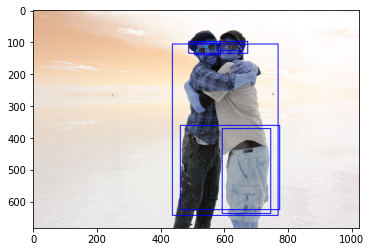

In [24]:
def get_xyxy_from_cowboy(img_name, df, json_label):
    xy_list = []
    fname_id_dict = {}
    for idx, row in df.iterrows():
        fname_id_dict.update({row['file_name']: row['id']})
    print('len(valid)=', len(fname_id_dict))
    with open(json_label) as f:
        jdata = json.load(f)
        for dict in tqdm(jdata):
            image_id = fname_id_dict[img_name]
            if image_id == dict['image_id']:
                # x_min, y_min, x_max, y_max = dict['bbox']
                x, y, w, h = dict['bbox']
                x_min, y_min, x_max, y_max = x, y, x + w, y + h
                xy_list.append([int(x_min), int(y_min), int(x_max), int(y_max)])

    return xy_list


def draw_rect(img, xy_list):
    for xy in xy_list:
        cv2.rectangle(img, (xy[0], xy[1]), (xy[2], xy[3]), (0, 0, 255), 2)


dataset_path = '/kaggle/input/cowboyoutfits/images/'
df = pd.read_csv('/kaggle/input/cowboyoutfits/valid.csv')
img_name = df['file_name'].sample(1).tolist()[0]
json_label = '/kaggle/working/answer.json'

print(img_name)
img = cv2.imread(os.path.join(dataset_path, img_name))
print(img.shape)  # (h,w,c)

xy_list = get_xyxy_from_cowboy(img_name, df, json_label)
draw_rect(img, xy_list)
plt.imshow(img)


In [25]:
!rm -rf mmdetection/